## Opis problemu

Znajdź dowolny zbiór danych (dozwolone języki: angielski, hiszpański, polski, szwedzki) (poza IMDB oraz zbiorami wykorzystywanymi na zajęciach) do analizy sentymentu.
Zbiór może mieć 2 lub 3 klasy.

Następnie:
1. Oczyść dane i zaprezentuj rozkład klas
2. Zbuduj model analizy sentymenu:
  - z wykorzystaniem sieci rekurencyjnej (LSTM/GRU/sieć dwukierunkowa) innej niż podstawowe RNN
  - z wykorzystaniem sieci CNN
  - z podstawiemiem pre-trained word embeddingów
  - z fine-tuningiem modelu języka (poza podstawowym BERTem)

3. Stwórz funkcję, która będzie korzystała z wytrenowanego modelu i zwracała wynik dla przekazanego pojedynczego zdania (zdań) w postaci komunikatu informującego użytkownika, czy tekst jest nacechowany negatywnie, pozytywnie (czy neutralnie w przypadku 3 klas).

4. Gotowe rozwiązanie zamieść na GitHubie z README. W README zawrzyj: informacje o danych - ich pochodzenie, oraz opis wybranego modelu i instrukcje korzystania z plików.
5. W assigmnencie w Teamsach wrzuć link do repo z rozwiązaniem. W przypadku prywatnego repo upewnij się, że będzie ono widoczne dla `dwnuk@pjwstk.edu.pl`.

**TERMIN**: jak w Teamsach


# Wstep

**PRZEGLĄD**

Zawiera 34 686 770 recenzji Amazon od 6 643 669 użytkowników na temat 2 441 053 produktów, z projektu Stanford Network Analysis Project (SNAP). Podzbiór ten zawiera 1 800 000 próbek szkoleniowych i 200 000 próbek testowych dla każdego sentymentu polaryzacji.

**POCHODZENIE**

Zbiór danych recenzji Amazon składa się z recenzji z Amazon. Dane obejmują okres 18 lat i obejmują około 35 milionów recenzji do marca 2013 r. Recenzje obejmują informacje o produktach i użytkownikach, oceny oraz recenzje w postaci zwykłego tekstu. Więcej informacji można znaleźć w artykułach: J. McAuley i J. Leskovec. Ukryte czynniki i ukryte tematy: zrozumienie wymiarów ocen na podstawie tekstu recenzji. RecSys, 2013.

**OPIS**

Zbiór danych zawiera dane o polaryzacji recenzji Amazona. W zbiorze danych klasa 1 jest ujemna, a klasa 2 jest pozytywna. Każda klasa ma 1 800 000 próbek szkoleniowych i 200 000 próbek testowych.

**UWAGI**

Z uwagi na duży rozmiar zbioru użytego podczas wykonywanego eksperymentu, dochodziło do liczbych przeciążeń ramowych. Dlatego też w jednym z pierwszych kroków postanowiłem zmniejszyć zbiór, by dane eksperyment wykonać. W przypadku posiadania większej zdolności obliczeniowej można podejść do eksperymentu ponownie już na pełnym zbiorze. Z uwagi na podzial zbioru, postanowiłem ponownie zbadać rozłożenie poszczególnych klas, ich liczba jest zbliżona, dlatego też postanowiłem kontynuować eksperyment.


**link**: *https://www.kaggle.com/code/purvitsharma/amazon-reviews-bidirectional-lstm?fbclid=IwAR2T8qe_2KR9IAM-vSJDDBH9EwThlC7on3b4CRHcnDO_AMBDtguZXtgP1cM*

# 1.0 Czyszczenie danych i wczytanie

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib. pyplot as plt
from wordcloud import WordCloud

In [4]:
column_names=["Sentiment","Title","Review"]
df_test = pd.read_csv("/content/drive/MyDrive/ZUM (1)/PROJEKT/test_amazon.csv", names=column_names)
df_train = pd.read_csv("/content/drive/MyDrive/ZUM (1)/PROJEKT/train_amazon.csv", names=column_names)

In [ ]:
len(df_test) #zaczynalismy 400000

400000

In [ ]:
len(df_train) #zaczynalismy 36000000

3600000

In [7]:
df_test = df_test.head(10000) #zaczynalismy duzo wiecej
df_train = df_train.head(400000)

In [8]:
#dane test
df_test.head(10)

,Sentiment,Title,Review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
5,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
6,1,Incorrect Disc,"I love the style of this, but after a couple y..."
7,1,DVD menu select problems,I cannot scroll through a DVD menu that is set...
8,2,Unique Weird Orientalia from the 1930's,"Exotic tales of the Orient from the 1930's. ""D..."
9,1,"Not an ""ultimate guide""","Firstly,I enjoyed the format and tone of the b..."


In [9]:
#dane train
df_train.head(10)

,Sentiment,Title,Review
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
5,2,an absolute masterpiece,I am quite sure any of you actually taking the...
6,1,Buyer beware,"This is a self-published book, and if you want..."
7,2,Glorious story,I loved Whisper of the wicked saints. The stor...
8,2,A FIVE STAR BOOK,I just finished reading Whisper of the Wicked ...
9,2,Whispers of the Wicked Saints,This was a easy to read book that made me want...


In [10]:
#Informacje o zbiorze testowym
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  10000 non-null  int64 
 1   Title      9999 non-null   object
 2   Review     10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [11]:
#Informacje o zbiorze treningowym
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sentiment  400000 non-null  int64 
 1   Title      399988 non-null  object
 2   Review     400000 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [12]:
#sprawdzenie pustych wartosci test
df_test.isna().sum()

Sentiment    0
Title        1
Review       0
dtype: int64

In [13]:
#sprawdzenie pustych wartosci train
df_train.isna().sum()

Sentiment     0
Title        12
Review        0
dtype: int64

In [14]:
#Usuniecie pustych rekordów
df_test.drop(df_test.columns[1], axis=1, inplace=True)
df_train.drop(df_train.columns[1], axis=1, inplace=True)

In [15]:
# Postanowiłem zmienić nazewnictwo dla łatwiejszej orientacji zbioru testowego
df_test['Sentiment'].replace(1, 0, inplace=True)
df_test['Sentiment'].replace(2, 1, inplace=True)
df_test.head()

,Sentiment,Review
0,1,My lovely Pat has one of the GREAT voices of h...
1,1,Despite the fact that I have only played a sma...
2,0,I bought this charger in Jul 2003 and it worke...
3,1,Check out Maha Energy's website. Their Powerex...
4,1,Reviewed quite a bit of the combo players and ...


In [16]:
# Zmiana wartości sentymentu na 1-> Pozytywne, 0-> Negatyne dla zbioru treningowego
df_train['Sentiment'].replace(1, 0, inplace=True)
df_train['Sentiment'].replace(2, 1, inplace=True)
df_train.head()

,Sentiment,Review
0,1,This sound track was beautiful! It paints the ...
1,1,I'm reading a lot of reviews saying that this ...
2,1,This soundtrack is my favorite music of all ti...
3,1,I truly like this soundtrack and I enjoy video...
4,1,"If you've played the game, you know how divine..."


In [17]:
#analiza sentymentów w zbiorze treningowym
sentiment_distribution = df_train['Sentiment'].value_counts()
sentiment_distribution

1    202068
0    197932
Name: Sentiment, dtype: int64

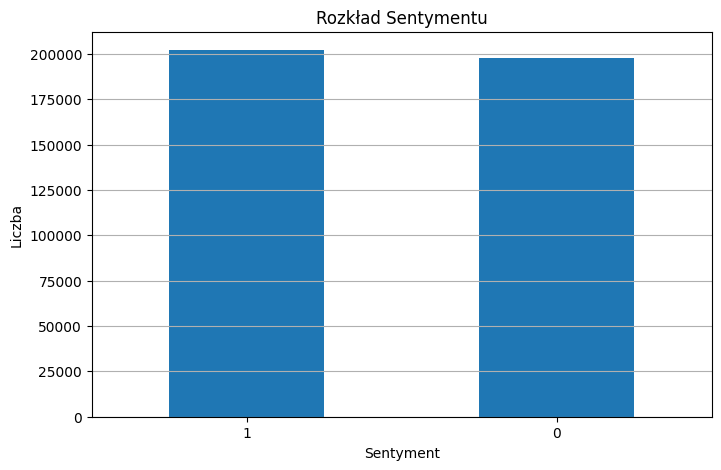

In [18]:
#wykres sentymentu
plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='bar')
plt.title('Rozkład Sentymentu')
plt.xlabel('Sentyment')
plt.ylabel('Liczba')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [19]:
# Czyszczenie danych
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [20]:
# Pobieranie  + słowa nieistotne (stop words)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
def clean_text(text):


    # Usuwanie znaków specjalnych, liczb i znaków interpunkcyjnych
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Usuń pojedyncze znaki z początku
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    # Zastąp wielokrotne spacje pojedynczą spacją
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Usuń prefiks 'b'
    text = re.sub(r'^b\s+', '', text)
    # Konwersja na małe litery
    text = text.lower()

        # Usuwanie znaczników HTML
    text = re.sub(r'<.*?>', '', text)

    # Tokenizacja i usunięcie stop words
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word not in stop_words]

    return ' '.join(filtered_text)


    return ' '.jonin

In [22]:
# Oczyszczanie danych (poprzez stworzonej nowej oczyszczonej kolumny)
df_train['cleaned_text'] = df_train['Review'].apply(clean_text)
df_test['cleaned_text'] = df_test['Review'].apply(clean_text)

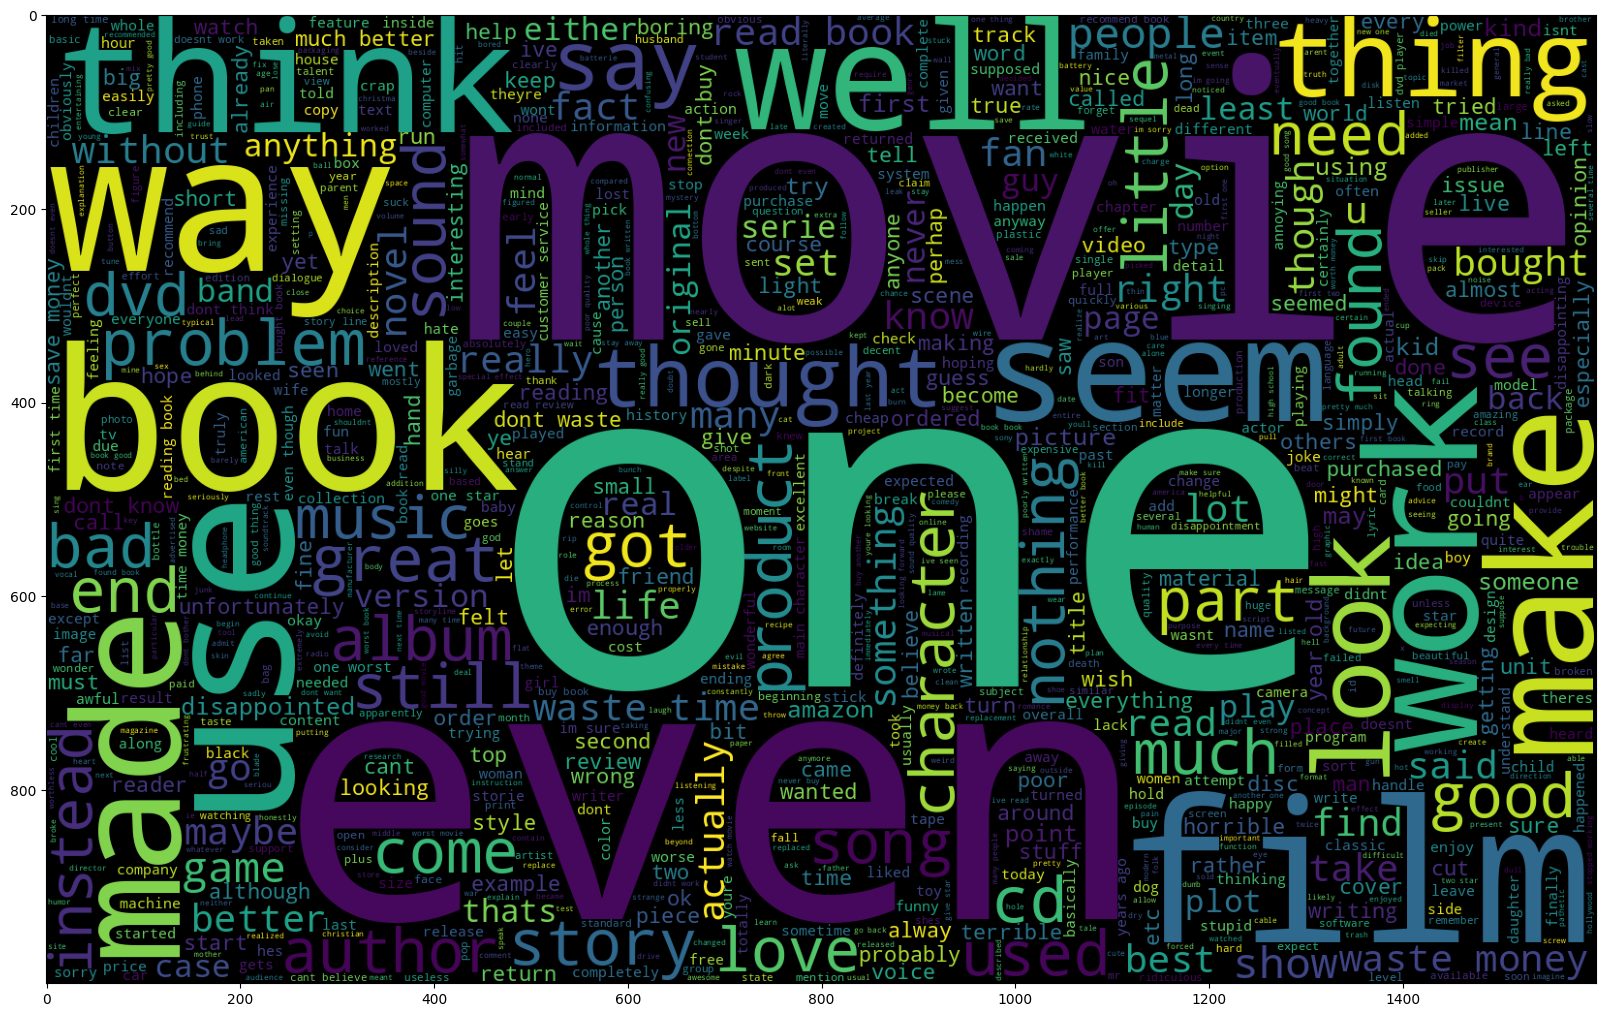

In [23]:
#test popularnosc slow w danych negatywnych
plt.figure(figsize=(20,20))
neg = WordCloud(max_words=2000,min_font_size=8, height=1000, width=1600,
               background_color="black").generate(" ".join(df_train[df_train["Sentiment"]==0].cleaned_text))

plt.imshow(neg)

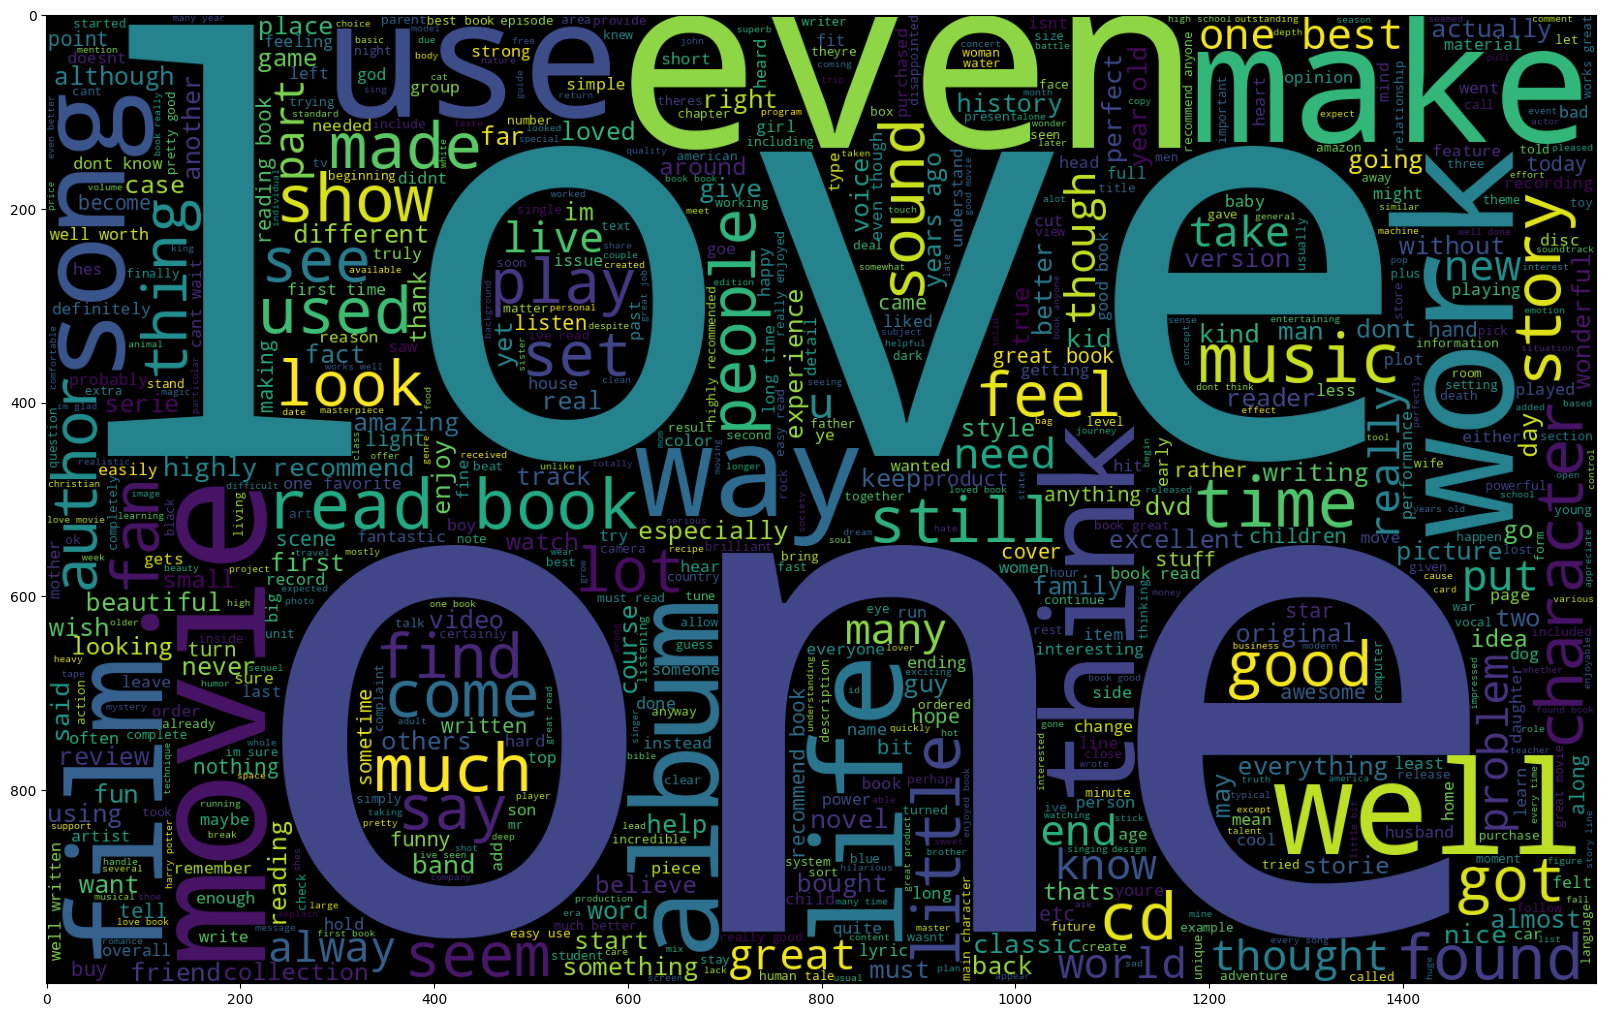

In [24]:
#test popularnosc slow w danych pozytywnych
plt.figure(figsize=(20,20))
poz = WordCloud(max_words=2000,min_font_size=8, height=1000, width=1600,
               background_color="black").generate(" ".join(df_train[df_train["Sentiment"]==1].cleaned_text))

plt.imshow(poz)

In [25]:
#analiza czyszczenia na zbiorze treningowym
df_train.head(15)

,Sentiment,Review,cleaned_text
0,1,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...
1,1,I'm reading a lot of reviews saying that this ...,im reading lot reviews saying best game soundt...
2,1,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...
3,1,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...
4,1,"If you've played the game, you know how divine...",youve played game know divine music every sing...
5,1,I am quite sure any of you actually taking the...,quite sure actually taking time read played ga...
6,0,"This is a self-published book, and if you want...",selfpublished book want know whyread paragraph...
7,1,I loved Whisper of the wicked saints. The stor...,loved whisper wicked saints story amazing plea...
8,1,I just finished reading Whisper of the Wicked ...,finished reading whisper wicked saints fell lo...
9,1,This was a easy to read book that made me want...,easy read book made want keep reading easy put...


# 2.1 Model LSTM

In [ ]:
# Podział danych treningowych
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train['Review'], df_train['Sentiment'], test_size=0.2, random_state=42)

In [26]:
#import bibliotek do tworzenia modelu

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Tokenizacja i sekwencje dla danych treningowych
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

Moze do usuniecia

In [ ]:
#tokenizacja danych
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

In [ ]:
#Padding
max_len = 64

X_train_seq_padded = pad_sequences(X_train_seq, maxlen = max_len)
X_val_seq_padded = pad_sequences(X_val_seq, maxlen= max_len)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.regularizers import L1L2

embedding_dim = 64  #kazde słowo bedzie reprezentowane jako 64 wymiarowy wektor
vocab_size = 1000000  #okreslam liczbe unikalnych slów
max_length = 64   #ograniczenie długosci sekwencji wejsciowej

#budowa sieci
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
modelLSTM.add(LSTM(units=32, return_sequences=True))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(LSTM(units=32))
modelLSTM.add(Dense(1, activation='sigmoid'))

modelLSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 64)            64000000  
                                                                 
 lstm (LSTM)                 (None, 64, 32)            12416     
                                                                 
 dropout (Dropout)           (None, 64, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 64020769 (244.22 MB)
Trainable params: 64020769 (244.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Uczenie modelu LSTM
history = modelLSTM.fit(X_train_seq_padded,
                         y_train, batch_size=2048, epochs=3,
                         validation_data=(X_val_seq_padded , y_val))

Epoch 1/3
176/176 [==============================] - 498s 3s/step - loss: 0.4069 - accuracy: 0.8103 - val_loss: 0.3206 - val_accuracy: 0.8628
Epoch 2/3
176/176 [==============================] - 504s 3s/step - loss: 0.2758 - accuracy: 0.8869 - val_loss: 0.3104 - val_accuracy: 0.8667
Epoch 3/3
176/176 [==============================] - 487s 3s/step - loss: 0.2250 - accuracy: 0.9103 - val_loss: 0.3063 - val_accuracy: 0.8736


PODSUMOWANIE WYNIKÓW:

**Epoch 1/3**
176/176 [==============================] - 498s 3s/step - loss: 0.4069 - accuracy: 0.8103 - val_loss: 0.3206 - val_accuracy: 0.8628

**Epoch 2/3**
176/176 [==============================] - 504s 3s/step - loss: 0.2758 - accuracy: 0.8869 - val_loss: 0.3104 - val_accuracy: 0.8667

**Epoch 3/3**
176/176 [==============================] - 487s 3s/step - loss: 0.2250 - accuracy: 0.9103 - val_loss: 0.3063 - val_accuracy: 0.8736


**Wnioski LSTM**

Zmniejszajaca wartosc loss wskazuje na rosnaca wydajnosc modelu, zmiana pomiedzy 2,3 epoką nie jest już tak duża jak przy przejsciu z 1 na 2 epokę, co moze świadczyć o początku generalizacji modelu.

Dokładnośc modelu (accuracy) wzrosła od 81,03% do 91,03% przy epoce 3. Rośnie nie tylko dokładność na zbiorze treningowym, ale widzimy delikatną poprawę na zbiorze walidacyjnym ok 1pp. pomiedzy 1, a 3 epoką.

Warto przetestowac model na większej liczbie epok (celowo obnizonym z uwagi na wielkość zbioru) w celu sprawdzenia jak zmienią się wyniki ewaluacji po dodaniu kilku epok.

# 2.2 CNN

In [ ]:
#Tworzenie modelu CNN
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

modelCNN = Sequential()
modelCNN.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
modelCNN.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
modelCNN.add(GlobalMaxPooling1D())
modelCNN.add(Dense(1, activation='sigmoid'))

modelCNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 64, 64)            64000000  
                                                                 
 conv1d (Conv1D)             (None, 64, 64)            24640     
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 64024705 (244.23 MB)
Trainable params: 64024705 (244.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Uczenie modelu CNN
history_CNN = modelCNN.fit(X_train_seq_padded,
                         y_train, batch_size=2048, epochs=3,
                         validation_data=(X_val_seq_padded, y_val))

Epoch 1/3
176/176 [==============================] - 398s 2s/step - loss: 0.4435 - accuracy: 0.7915 - val_loss: 0.3066 - val_accuracy: 0.8702
Epoch 2/3
176/176 [==============================] - 390s 2s/step - loss: 0.2643 - accuracy: 0.8921 - val_loss: 0.2749 - val_accuracy: 0.8858
Epoch 3/3
176/176 [==============================] - 393s 2s/step - loss: 0.2108 - accuracy: 0.9178 - val_loss: 0.2726 - val_accuracy: 0.8878


**Wnioski**

**Epoch 1/3**
176/176 [==============================] - 398s 2s/step - loss: 0.4435 - accuracy: 0.7915 - val_loss: 0.3066 - val_accuracy: 0.8702

**Epoch 2/3**
176/176 [==============================] - 390s 2s/step - loss: 0.2643 - accuracy: 0.8921 - val_loss: 0.2749 - val_accuracy: 0.8858

**Epoch 3/3**
176/176 [==============================] - 393s 2s/step - loss: 0.2108 - accuracy: 0.9178 - val_loss: 0.2726 - val_accuracy: 0.8878

**Wnioski CNN**

Zmniejszajaca wartosc loss wskazuje na rosnaca wydajnosc modelu, zmiana pomiedzy 2,3 epoką nie jest już tak duża jak przy przejsciu z 1 na 2 epokę, co moze świadczyć o początku generalizacji modelu.

Dokładnośc modelu (accuracy) wzrosła od 79,15% do 91,78% przy epoce 3. Rośnie nie tylko dokładność na zbiorze treningowym, ale widzimy delikatną poprawę na zbiorze walidacyjnym.

Podobnie jak w przypadku modelu LSTM, warto przetestowac model na większej liczbie epok (celowo obnizonym z uwagi na wielkość zbioru) w celu sprawdzenia jak zmienią się wyniki ewaluacji po dodaniu kilku epok.

# 2.3 Pre-trained wordembeddings


In [ ]:
#załadowanie modelu z dysku

path = '/content/drive/MyDrive/ZUM (1)/PROJEKT/glove.6B.50d.txt'

In [ ]:
# Załadowanie słownika
embeddings_index = {}
with open(path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
#tworzenie macierzy i  przygoowanie do tworzenia modelu

embedding_dim = 50
max_length = 64
vocab_size = 1000000

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# Tworzenie modelu ML
modelPRE = Sequential()
modelPRE.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=False))
modelPRE.add(Flatten())
modelPRE.add(Dense(128, activation='relu'))
modelPRE.add(Dense(1, activation='sigmoid'))

modelPRE.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelPRE.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 64, 50)            50000000  
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               409728    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50409857 (192.30 MB)
Trainable params: 409857 (1.56 MB)
Non-trainable params: 50000000 (190.73 MB)
_________________________________________________________________


In [ ]:
history_model_PRE =  modelPRE.fit(X_train_seq_padded,
                         y_train, batch_size=2048, epochs=3,
                         validation_data=(X_val_seq_padded, y_val))

Epoch 1/3
176/176 [==============================] - 20s 110ms/step - loss: 0.5974 - accuracy: 0.6821 - val_loss: 0.5405 - val_accuracy: 0.7275
Epoch 2/3
176/176 [==============================] - 18s 103ms/step - loss: 0.5312 - accuracy: 0.7324 - val_loss: 0.5351 - val_accuracy: 0.7296
Epoch 3/3
176/176 [==============================] - 18s 103ms/step - loss: 0.5169 - accuracy: 0.7416 - val_loss: 0.5314 - val_accuracy: 0.7303


**Epoch 1/3**

176/176 [==============================] - 20s 110ms/step - loss: 0.5974 - accuracy: 0.6821 - val_loss: 0.5405 - val_accuracy: 0.7275

**Epoch 2/3**

176/176 [==============================] - 18s 103ms/step - loss: 0.5312 - accuracy: 0.7324 - val_loss: 0.5351 - val_accuracy: 0.7296

**Epoch 3/3**

176/176 [==============================] - 18s 103ms/step - loss: 0.5169 - accuracy: 0.7416 - val_loss: 0.5314 - val_accuracy: 0.7303

**Zmiana**

Początkowo z uwagi na inne zastosowane modele postanowiłem ustawić w modelu PRE-treined również 3 epoki. Jednak widząc tempo uczenia modelu, które jest dużo szybsze niż w modelu CNN i LSTM postanowiłem zwiększyć liczbę epok do 10.

In [ ]:
history_model_PRE_more_epochs =  modelPRE.fit(X_train_seq_padded,
                         y_train, batch_size=2048, epochs=10,
                         validation_data=(X_val_seq_padded, y_val))

Epoch 1/10
176/176 [==============================] - 19s 109ms/step - loss: 0.5007 - accuracy: 0.7526 - val_loss: 0.5247 - val_accuracy: 0.7370
Epoch 2/10
176/176 [==============================] - 19s 111ms/step - loss: 0.4812 - accuracy: 0.7663 - val_loss: 0.5217 - val_accuracy: 0.7396
Epoch 3/10
176/176 [==============================] - 19s 108ms/step - loss: 0.4576 - accuracy: 0.7814 - val_loss: 0.5254 - val_accuracy: 0.7394
Epoch 4/10
176/176 [==============================] - 18s 104ms/step - loss: 0.4289 - accuracy: 0.8005 - val_loss: 0.5365 - val_accuracy: 0.7379
Epoch 5/10
176/176 [==============================] - 22s 123ms/step - loss: 0.3970 - accuracy: 0.8196 - val_loss: 0.5439 - val_accuracy: 0.7341
Epoch 6/10
176/176 [==============================] - 25s 141ms/step - loss: 0.3654 - accuracy: 0.8377 - val_loss: 0.5662 - val_accuracy: 0.7321
Epoch 7/10
176/176 [==============================] - 20s 116ms/step - loss: 0.3336 - accuracy: 0.8558 - val_loss: 0.5885 - val_ac

**Epoch 1/10**

176/176 [==============================] - 19s 109ms/step - loss: 0.5007 - accuracy: 0.7526 - val_loss: 0.5247 - val_accuracy: 0.7370

**Epoch 2/10**

176/176 [==============================] - 19s 111ms/step - loss: 0.4812 - accuracy: 0.7663 - val_loss: 0.5217 - val_accuracy: 0.7396

**Epoch 3/10**
176/176 [==============================] - 19s 108ms/step - loss: 0.4576 - accuracy: 0.7814 - val_loss: 0.5254 - val_accuracy: 0.7394

**Epoch 4/10**

176/176 [==============================] - 18s 104ms/step - loss: 0.4289 - accuracy: 0.8005 - val_loss: 0.5365 - val_accuracy: 0.7379

**Epoch 5/10**

176/176 [==============================] - 22s 123ms/step - loss: 0.3970 - accuracy: 0.8196 - val_loss: 0.5439 - val_accuracy: 0.7341

**Epoch 6/10**

176/176 [==============================] - 25s 141ms/step - loss: 0.3654 - accuracy: 0.8377 - val_loss: 0.5662 - val_accuracy: 0.7321

**Epoch 7/10**

176/176 [==============================] - 20s 116ms/step - loss: 0.3336 - accuracy: 0.8558 - val_loss: 0.5885 - val_accuracy: 0.7292

**Epoch 8/10**

176/176 [==============================] - 20s 114ms/step - loss: 0.3019 - accuracy: 0.8728 - val_loss: 0.6124 - val_accuracy: 0.7260

**Epoch 9/10**

176/176 [==============================] - 20s 115ms/step - loss: 0.2698 - accuracy: 0.8899 - val_loss: 0.6653 - val_accuracy: 0.7173

**Epoch 10/10**

176/176 [==============================] - 19s 109ms/step - loss: 0.2416 - accuracy: 0.9043 - val_loss: 0.6843 - val_accuracy: 0.7217

**Wnioski:**


Liczba epok przy modelu PRE wpływa znacząco na wynik. Zwiększene epok z 3 (tak jak to mialo miejsce w modelu LSTM oraz CNN) do 10 sprawilo, że model lepiej się uczy i zwraca lepsze rezultaty. Model 2 wykazuje znacznie większą poprawę w dokładności, co prawdopodobnie wynika z dłuższego procesu treningu.

Model 2 ma wyraźne oznaki nadmiernego dopasowania. Po kilku początkowych epokach, gdzie wyniki walidacyjne są stabilne lub lekko poprawiają się, widać znaczący wzrost straty i spadek dokładności na zestawie walidacyjnym, podczas gdy wyniki treningowe nadal się poprawiają.

Warto w modelu 2 dodać ktorąś z technik regularyzacji np. dropout by wyeliminować rosnące dopasowanie.

# 2.4 fine-tuningiem

In [ ]:
#niestety nie udało się zrobić tego modelu. Przy próbie jego zastosowania wyrzucalo liczne błędy

# 3.0 Funcja analizująca

In [ ]:
def predict_sentiment(model, tokenizer, sentence, max_length):

    # tokenizacja i padding
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Predykcja sentymentu
    prediction = model.predict(padded_sequence)[0]

    #Warunki funkcji
    if len(prediction) == 2:
        class_labels = ['Negative', 'Positive']
        return class_labels[np.argmax(prediction)]
    else:  # For binary classification [negative, positive]
        return 'Positive' if prediction[0] > 0.5 else 'Negative'

In [ ]:
#Przykład opinii w celu sprawdzenia funkcji
sentence1 = "I hate this book"
sentence2 = "I love this book"

In [ ]:
#analiza sentymentu negatywnego
sentiment1 = predict_sentiment(modelCNN, tokenizer, sentence1, max_length)

1/1 [==============================] - 0s 35ms/step


In [ ]:
#analiza sentymentu pozytywnego
sentiment2 = predict_sentiment(modelCNN, tokenizer, sentence2, max_length)

1/1 [==============================] - 0s 48ms/step


In [ ]:
#sprawdzenie sentymentu zdania 1
print(f"The sentiment of the sentence '{sentence1}' is: {sentiment1}")

The sentiment of the sentence 'I hate this book' is: Negative


In [ ]:
#sprawdzenie sentymentu zdania 2
print(f"The sentiment of the sentence '{sentence2}' is: {sentiment2}")

The sentiment of the sentence 'I love this book' is: Positive
